In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [84]:
data = pd.read_csv('/content/google.csv',date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600


In [85]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
...,...,...,...,...,...,...,...
3611,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3612,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3613,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3614,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [86]:
data_test = data[data['Date']>'2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3616,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3617,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3618,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3619,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3620,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3804,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3805,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3806,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3807,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [87]:
training_data = data_training.drop(['Date','Adj Close'],axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,50.316402,54.336334,50.062355,53.952770,22942800
1,55.168217,56.528118,54.321388,54.495735,18342800
2,55.412300,55.591629,51.591621,52.239193,15319700
3,52.284027,53.798351,51.746044,52.802086,9232100
4,52.279045,53.773445,52.134586,53.753517,7128600


In [88]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[7.42148227e-04, 2.98909923e-03, 6.47716504e-04, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 4.19769536e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 1.92238659e-03, 1.98678849e-03,
        1.85522018e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.89936884e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20026849e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12100139e-01, 8.09012935e-01,
        1.79975186e-02]])

In [89]:
X_train = []
y_train = []

for i in range(60,training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [90]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [91]:
X_train.shape

(3556, 60, 5)

In [92]:
y_train.shape

(3556,)

In [93]:
# Built Neural network

In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [95]:
regresion = Sequential()
regresion.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],5)))
regresion.add(Dropout(0.2))

regresion.add(LSTM(units=60,activation='relu',return_sequences=True))
regresion.add(Dropout(0.3))

regresion.add(LSTM(units=80,activation='relu',return_sequences=True))
regresion.add(Dropout(0.4))

regresion.add(LSTM(units=120,activation='relu'))
regresion.add(Dropout(0.5))

regresion.add(Dense(units=1))

In [96]:

regresion.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 120)              

In [97]:
regresion.compile(optimizer='adam',loss='mean_squared_error')

In [98]:
regresion.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
112/112 [==============================] - 18s 162ms/step - loss: 0.0155
Epoch 2/50
112/112 [==============================] - 18s 164ms/step - loss: 0.0053
Epoch 3/50
112/112 [==============================] - 19s 167ms/step - loss: 0.0045
Epoch 4/50
112/112 [==============================] - 19s 167ms/step - loss: 0.0035
Epoch 5/50
112/112 [==============================] - 18s 165ms/step - loss: 0.0031
Epoch 6/50
112/112 [==============================] - 18s 164ms/step - loss: 0.0031
Epoch 7/50
112/112 [==============================] - 18s 164ms/step - loss: 0.0029
Epoch 8/50
112/112 [==============================] - 18s 165ms/step - loss: 0.0029
Epoch 9/50
112/112 [==============================] - 18s 165ms/step - loss: 0.0027
Epoch 10/50
112/112 [==============================] - 19s 165ms/step - loss: 0.0025
Epoch 11/50
112/112 [==============================] - 19s 168ms/step - loss: 0.0023
Epoch 12/50
112/112 [==============================] - 19s 170ms/step - lo

In [99]:
## prepare test dataset

In [100]:
past_60_days = data_training.tail(60)

In [101]:
df = past_60_days.append(data_test,ignore_index=True)
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [102]:
inputs = scaler.transform(df)
len(inputs)

253

In [103]:
X_test = []
y_test = []

for i in range(60,inputs.shape[0]):
    print(i)
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


In [104]:
X_test,y_test = np.array(X_test),np.array(y_test)
X_test.shape,y_test.shape

((193, 60, 5), (193,))

In [129]:
y_pred = regresion.predict(X_test)

In [130]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.33517573e-04, 8.20673293e-04,
       1.21162775e-08])

In [131]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [132]:
y_pred = y_pred*scale
y_test = y_test*scale

In [109]:
# Vissulization

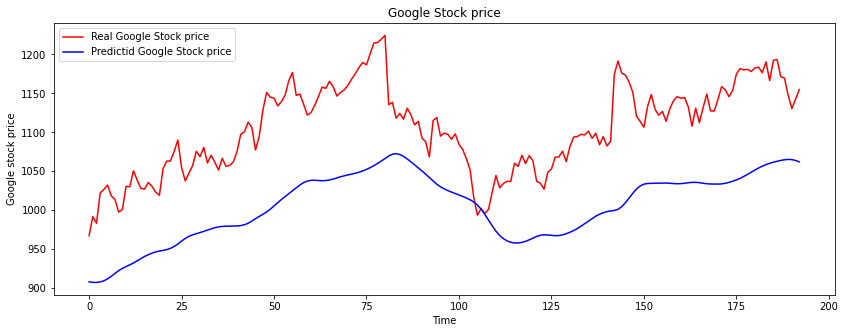

In [110]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color = 'red',label='Real Google Stock price')
plt.plot(y_pred,color = 'blue',label='Predictid Google Stock price')
plt.title('Google Stock price')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.savefig('google.png')
plt.show()